In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Splitting Data

In [3]:
# Vertical Split
features = ["YearsExperience"]
X = df[features]
target = "Salary"
y = df[target]

# Horizontal Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Plot of Experience vs Salary

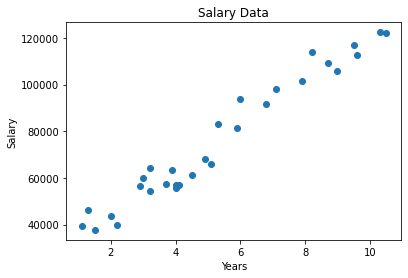

In [4]:
plt.scatter(X, y)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data");

## Build Model

In [5]:
# Baseline Error
y_mean = y_train.mean()
print("Mean error : ", round(y_mean, 2))
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline error iteration: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", round(mae_baseline, 2))

Mean error :  74207.62
Baseline error iteration:  [74207.625, 74207.625, 74207.625, 74207.625, 74207.625]
MAE Baseline:  25065.4


### Scatter Plot with Baseline Model

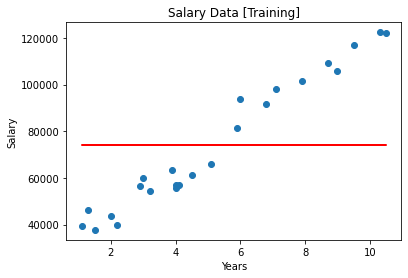

In [6]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_baseline, color="red", label="Baseline Model")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data [Training]");

## Model Instantiation

In [7]:
# Instantiation and Training a model
model = LinearRegression().fit(X_train, y_train)
model 

LinearRegression()

### Model Performance

In [8]:
# Evaluation based on prediciton
y_pred = model.predict(X_train)
print("Prediction after model: ", y_pred[:3])
mae_pred = mean_absolute_error(y_train, y_pred)
print("MAE after prediciton: ", round(mae_pred, 2))


Prediction after model:  [122386.880839   107308.77632215  63016.8443039 ]
MAE after prediciton:  4221.05


#### Extract Intercept

In [9]:
intercept = round(model.intercept_, 2)
print("Model Intercept: ", intercept)

Model Intercept:  25321.58


#### Extract Coefficient

In [10]:
coefficient = round(model.coef_[0], 2)
print("Coefficient of the Model: ", coefficient)

Coefficient of the Model:  9423.82


## Linear Regression Equation

In [11]:
print(f"Salary = {intercept} + {coefficient} * YearsExperience")

Salary = 25321.58 + 9423.82 * YearsExperience


## Model Evaluation

In [12]:
# Evaluation based on score
print("Score for training data: ", round(model.score(X_train, y_train), 2))
print("Score for testing data: ", round(model.score(X_test, y_test), 2))

Score for training data:  0.96
Score for testing data:  0.9


### Model Visualization with Training Data

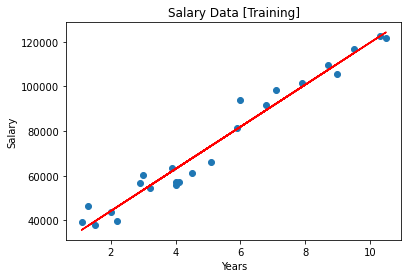

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color="red")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data [Training]");

### Model Visualization with Test Data

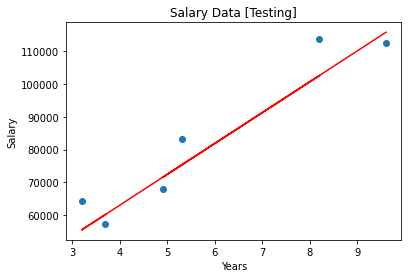

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color="red")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data [Testing]");